## Overview of Clustering Assignment Case Study

The steps of this analysis are:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis

## Step 1:- Read and understand the data

In [54]:
# Import Warnings
import warnings
warnings.filterwarnings('ignore')

In [55]:
# import important Libraries
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [56]:
# read the dataset
data = pd.read_csv("D:/Documents/python/Clustering/Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [57]:
# sahpe of data
data.shape

(167, 10)

In [58]:
# checking data types of different variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


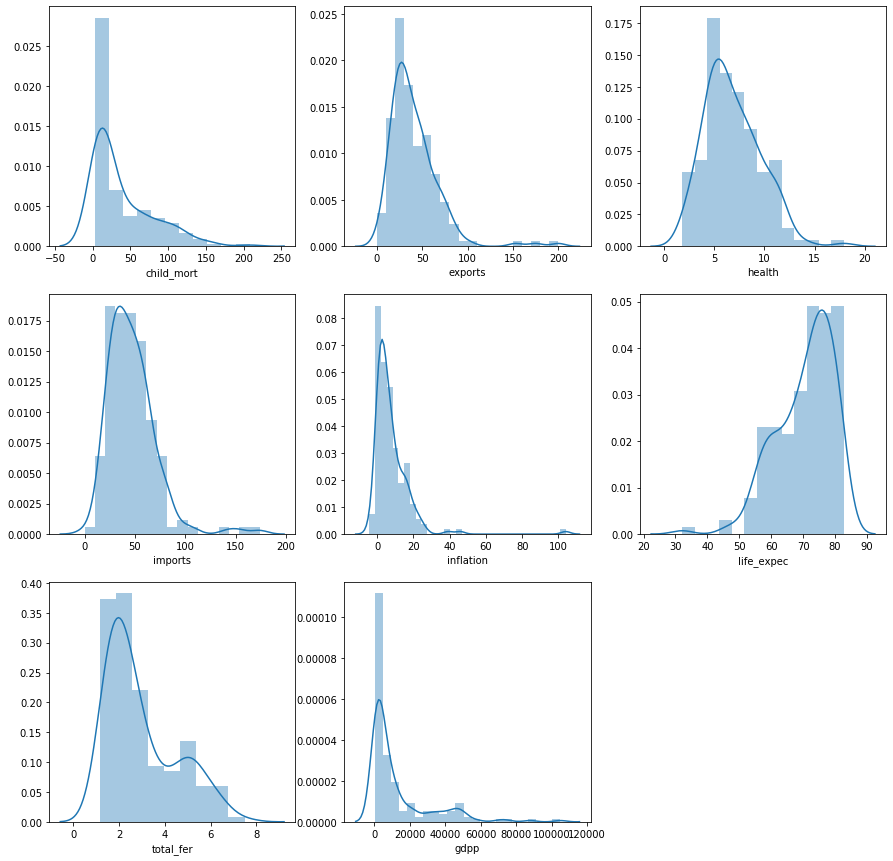

In [59]:
# visualising the distribution of data
plt.figure(figsize=(15,15))
feature = ['child_mort', 'exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(data[i[1]])

In 'total_fre' and 'gdpp' we can see that data is distributed in two sets

## Step 2:- Cleaning the data

In [60]:
# checking for number of missing values
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Here we can see that there is no missing value in the in the dataframe so we can continue with the same variables as they already are.

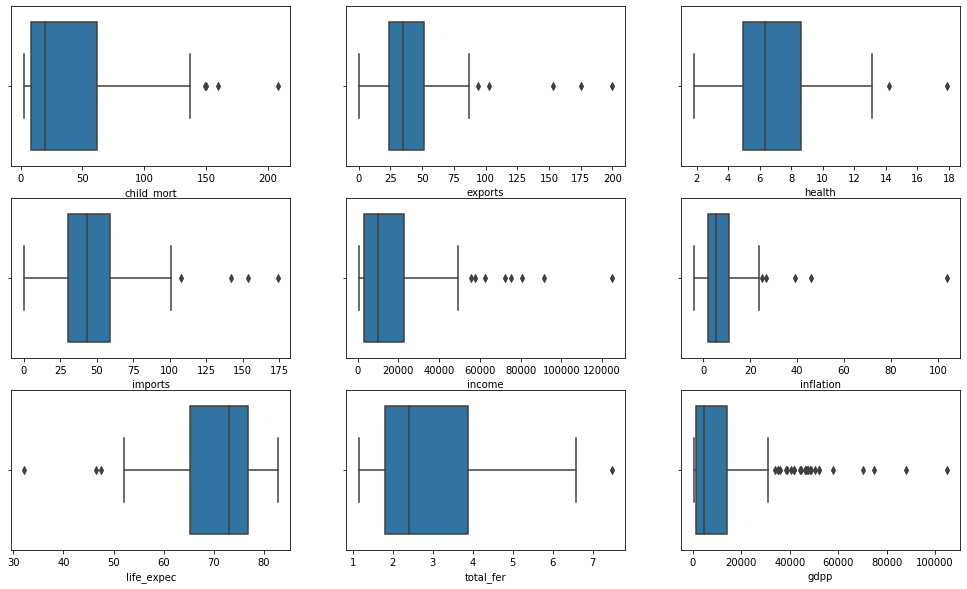

In [61]:
# checking for outliers
plt.figure(figsize=(17,10))
feature = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data[i[1]])

As we can see there are a number of outliers in the data.
We will cap the outliers to values accordingly for analysis because we have less data and less outliers.

In [62]:
# outlier treatment for child_mort
q1 = data.child_mort.quantile(0.05)
q4 = data.child_mort.quantile(0.95)
data['child_mort'][data['child_mort']<=q1]=q1
data['child_mort'][data['child_mort']>=q4]=q4

# outlier treatment for exports
q1 = data.exports.quantile(0.05)
q4 = data.exports.quantile(0.95)
data['exports'][data['exports']<=q1]=q1
data['exports'][data['exports']>=q4]=q4

# outlier treatment for health
q1 = data.health.quantile(0.05)
q4 = data.health.quantile(0.95)
data['health'][data['health']<=q1]=q1
data['health'][data['health']>=q4]=q4

# outlier treatment for imports
q1 = data.imports.quantile(0.05)
q4 = data.imports.quantile(0.95)
data['imports'][data['imports']<=q1]=q1
data['imports'][data['imports']>=q4]=q4

# outlier treatment for income
q1 = data.income.quantile(0.05)
q4 = data.income.quantile(0.95)
data['income'][data['income']<=q1]=q1
data['income'][data['income']>=q4]=q4

# outlier treatment for inflation
q1 = data.inflation.quantile(0.05)
q4 = data.inflation.quantile(0.95)
data['inflation'][data['inflation']<=q1]=q1
data['inflation'][data['inflation']>=q4]=q4

# outlier treatment for life_expec
q1 = data.life_expec.quantile(0.05)
q4 = data.life_expec.quantile(0.95)
data['life_expec'][data['life_expec']<=q1]=q1
data['life_expec'][data['life_expec']>=q4]=q4

# outlier treatment for total_fer
q1 = data.total_fer.quantile(0.05)
q4 = data.total_fer.quantile(0.95)
data['total_fer'][data['total_fer']<=q1]=q1
data['total_fer'][data['total_fer']>=q4]=q4

# outlier treatment for gdpp
q1 = data.gdpp.quantile(0.05)
q4 = data.gdpp.quantile(0.95)
data['gdpp'][data['gdpp']<=q1]=q1
data['gdpp'][data['gdpp']>=q4]=q4

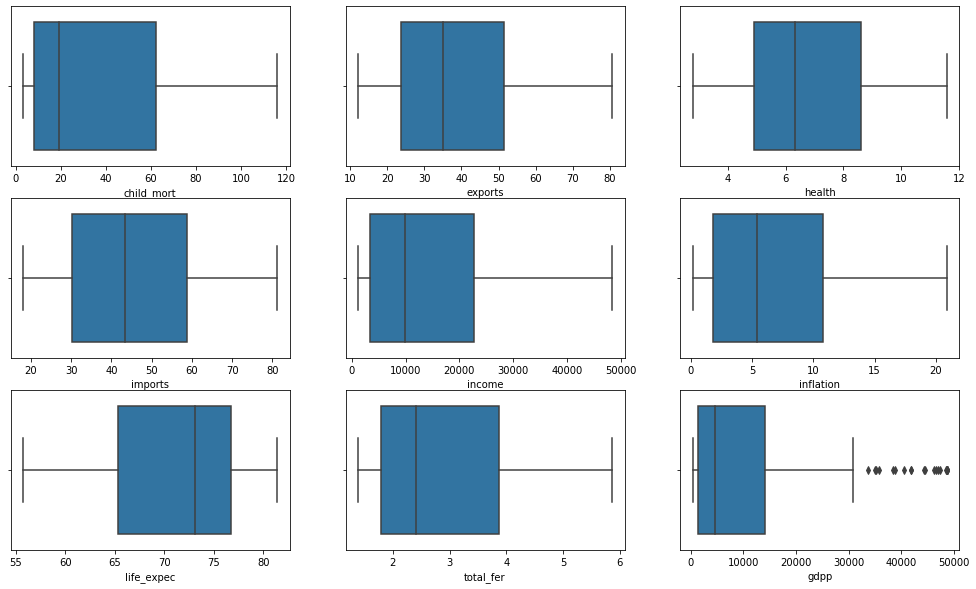

In [63]:
# again checking for outliers
plt.figure(figsize=(17,10))
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data[i[1]])

Here we see that almost all the outliers have been treated, now we can use the data for modelling

## Step 3:- Preparing the data for modelling 

In [64]:
# Before manipulating data, we will save one copy of orignal data.
data_copy = data.copy()
data_copy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0
3,Angola,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0


In [65]:
# Dropping 'country' column
data.drop('country', axis=1, inplace=True)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0
1,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0
2,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0
3,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0
4,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0


### Scaling the Data

In [66]:
scale = StandardScaler()
data_copy2=scale.fit_transform(data)

In [67]:
data_copy2= pd.DataFrame(data_copy2)
data_copy2.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
data_copy2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-1.371444,0.322232,-0.025440,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.570493,-0.086218,0.177314,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.045941,-1.030017,-0.765221,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,1.159521,-1.553469,-0.135037,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,0.312167,-0.292427,0.741740,0.227115,-0.891802,0.744836,-0.552591,0.012991


## Step 4:- Modelling

In [68]:
# checking cluster tendency by Hopkins

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [69]:
hopkins(data_copy2)

0.7442664838634608

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [70]:
# Since our obtained value is between 0.7 and 0.9 
# It shows that the prepared data is very different from the randomly generated data.
# Which also means it has a high tendency to cluster.

### K Means

Choose the value of K

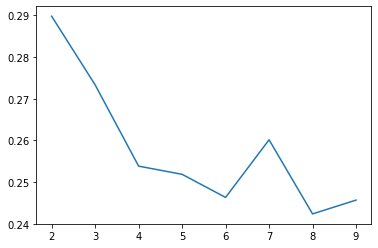

In [71]:
# silhouette curve
ss = []
for k in range(2,10):
    kmeans=KMeans(n_clusters=k).fit(data_copy2)
    ss.append([k, silhouette_score(data_copy2, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

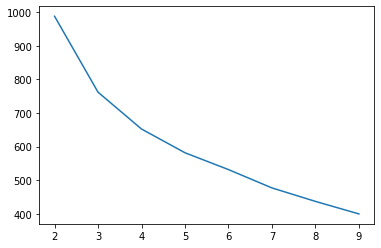

In [72]:
# Elbow curve
ssd = []
for k in range(2,10):
    model=KMeans(n_clusters=k).fit(data_copy2)
    ssd.append([k, model.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

here we can see that we get elbows at 3, 4, 5 and 7

we will take the first elbow i.e. 3 as value of k, 

because other elbows will end up having so many clusters

#### Running k mean with value 3


In [73]:
kmean = KMeans(n_clusters = 3, random_state = 50) #here we use random_state to ensure that the labels given to each clusters are same all the time
kmean.fit(data_copy2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [74]:
# visualising the labels
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [75]:
data_copy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0
3,Angola,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0


In [76]:
# adding labels to the data frame
data_km = pd.concat([data_copy, pd.Series(kmean.labels_)], axis =1)

In [77]:
data_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0,1
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0,1
3,Angola,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0,1


### Cluster Profiling

In [78]:
# changing name of column
data_km.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'label']
data_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0,1
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0,1
3,Angola,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0,1


In [79]:
# checking number of data points in each cluster
data_km.label.value_counts()

1    79
0    51
2    37
Name: label, dtype: int64

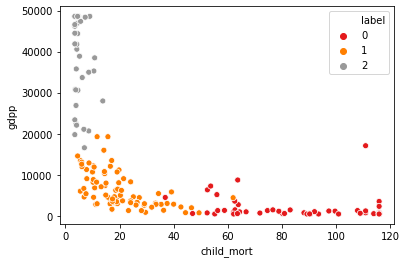

In [80]:
# distribution of labels between child_mort and gdpp
sns.scatterplot(x = "child_mort" , y = "gdpp", hue = 'label', data = data_km, palette = "Set1")

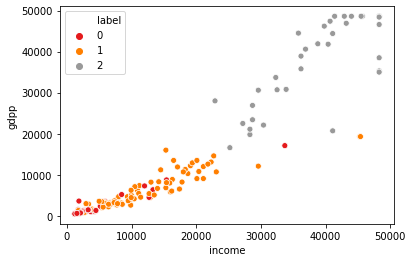

In [81]:
# distribution of labels between income and gdpp
sns.scatterplot(x = "income" , y = "gdpp", hue = 'label', data = data_km, palette = "Set1")

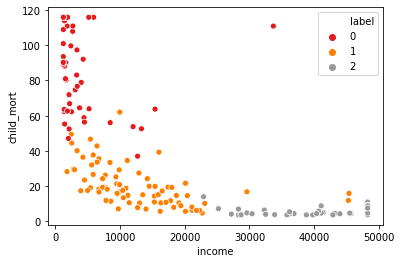

In [82]:
# distribution of labels between child_mort and income
sns.scatterplot(x = "income" , y = "child_mort", hue = 'label', data = data_km, palette = "Set1")

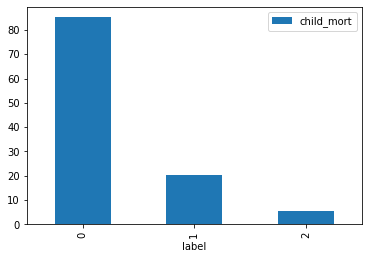

In [83]:
data_km[['child_mort', 'label']].groupby("label").mean().plot(kind = 'bar')

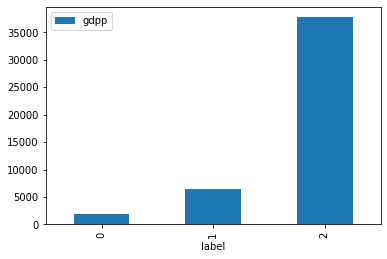

In [84]:
data_km[['gdpp', 'label']].groupby("label").mean().plot(kind = 'bar')

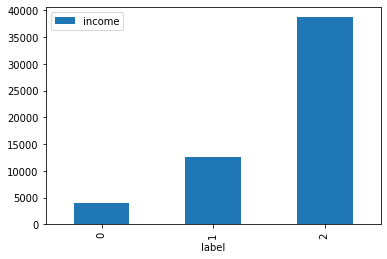

In [85]:
data_km[['income', 'label']].groupby("label").mean().plot(kind = 'bar')

Here we can see that cluster 0 has low gdpp, low income anh high child_mort

Hence we can say that countries under cluster 0 are the ones which are in need for the aid

In [86]:
# observing countries under cluster o with low gdpp, low income and high child_mort
data_km[data_km['label']==0].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
31,Central African Republic,116.0,12.12,3.980,26.50,1213.0,2.010,55.78,5.210,465.9,0
37,"Congo, Dem. Rep.",116.0,41.10,7.910,49.60,1213.0,20.800,57.50,5.861,465.9,0
112,Niger,116.0,22.20,5.160,49.10,1213.0,2.550,58.80,5.861,465.9,0
132,Sierra Leone,116.0,16.80,11.570,34.50,1220.0,17.200,55.78,5.200,465.9,0
106,Mozambique,101.0,31.50,5.210,46.20,1213.0,7.640,55.78,5.560,465.9,0
26,Burundi,93.6,12.12,11.570,39.20,1213.0,12.300,57.70,5.861,465.9,0
94,Malawi,90.5,22.80,6.590,34.90,1213.0,12.100,55.78,5.310,465.9,0
88,Liberia,89.3,19.10,11.570,81.14,1213.0,5.470,60.80,5.020,465.9,0
93,Madagascar,62.2,25.00,3.770,43.00,1390.0,8.790,60.80,4.600,465.9,0
50,Eritrea,55.2,12.12,2.791,23.30,1420.0,11.600,61.70,4.610,482.0,0


### Hierarchical clustering

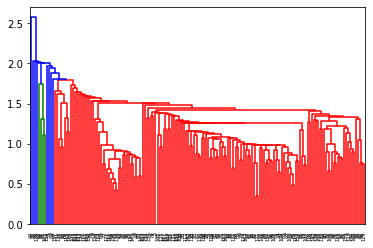

In [87]:
# single linkage
mergings = linkage(data_copy2, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

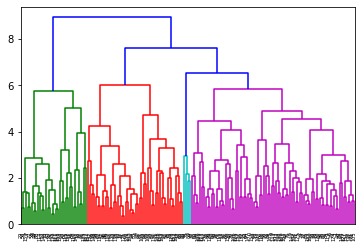

In [88]:
#complete linkage
mergings = linkage(data_copy2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Complete likage seems to be a much better dendogram than single linkage

In [89]:
cut_tree(mergings, n_clusters=3).shape

(167, 1)

so basically it's a one dimensional array of 167 observations

In [90]:
# observing cluster labels
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1,
       0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0])

In [91]:
# assign cluster labels
data_km['cluster_labels'] = cluster_labels
data_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0,0,0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0,1,0
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0,1,0
3,Angola,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0,0,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0,1,1


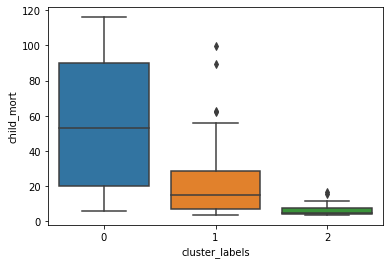

In [92]:
# plot to determine child_mort per clusters
sns.boxplot(x='cluster_labels', y='child_mort', data=data_km)

Here we can see that countries under cluster 0 is greatest in child_mort 

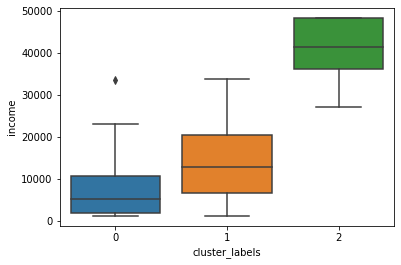

In [93]:
# plot to determine income per clusters
sns.boxplot(x='cluster_labels', y='income', data=data_km)

Here we see that countries under cluster 0 are one having the lowest income among other clusters

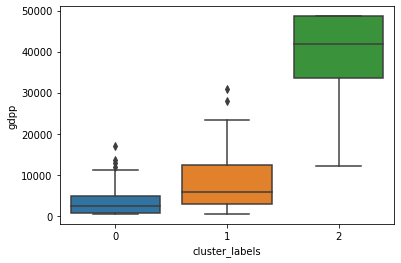

In [94]:
# plot to determine gdpp per clusters
sns.boxplot(x='cluster_labels', y='gdpp', data=data_km)

And here we can see that countries under cluster 0 are the one with lowest gdpp rate as compared to other two clusters, hence we can say that countries under cluster 0 are the ones which are in need for the aid

## Step 5:- Final Analysis

Following countries are the ones which are in need for the aid

In [95]:
print(data_km[data_km['label']==0].country.values)

['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'India' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan'
 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
